## Install and Import Dependencies

In [7]:
!pip install tensorflow==2.4.1 mediapipe opencv-python sklearn matplotlib

In [49]:
pip list

Package                            VersionNote: you may need to restart the kernel to use updated packages.

---------------------------------- -------------------
absl-py                            0.15.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.2.0
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.func

In [1]:
import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## Access webcam and keypoints using MP

In [2]:
#Holistic MP Model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False # Don't change frame
    results = model.process(image) # Detecting using Mediapipe, Image is a single frame
    image.flags.writeable = True # New Frame
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76),thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250),thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,110,66),thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,40,230),thickness=2, circle_radius=2))

In [6]:
mp_drawing.draw_landmarks??

In [47]:
#Loop through multiple frames
cap = cv2.VideoCapture(0)
#Setting mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read Feed
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw Landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('Feed', image)
        #Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [44]:
results.face_landmarks

landmark {
  x: 0.57528263
  y: 0.45161697
  z: -0.032043766
}
landmark {
  x: 0.5851378
  y: 0.40283367
  z: -0.05003652
}
landmark {
  x: 0.57837826
  y: 0.41986653
  z: -0.028600113
}
landmark {
  x: 0.5754087
  y: 0.36019006
  z: -0.036581483
}
landmark {
  x: 0.58647156
  y: 0.38891587
  z: -0.05225581
}
landmark {
  x: 0.58566093
  y: 0.3722979
  z: -0.047209162
}
landmark {
  x: 0.58125186
  y: 0.33378285
  z: -0.017994868
}
landmark {
  x: 0.5025485
  y: 0.32118228
  z: -0.00023544242
}
landmark {
  x: 0.5812602
  y: 0.3015741
  z: -0.008948692
}
landmark {
  x: 0.5827167
  y: 0.28334594
  z: -0.009205819
}
landmark {
  x: 0.5831423
  y: 0.22049695
  z: 0.006605807
}
landmark {
  x: 0.574446
  y: 0.45870492
  z: -0.031251483
}
landmark {
  x: 0.5730027
  y: 0.46443224
  z: -0.02853488
}
landmark {
  x: 0.571444
  y: 0.46707126
  z: -0.024761358
}
landmark {
  x: 0.57124555
  y: 0.47248453
  z: -0.02482806
}
landmark {
  x: 0.57129514
  y: 0.47831455
  z: -0.02675987
}
landmark 

In [8]:
draw_landmarks(frame, results)

## Extract Keypoint Values

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.z, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.z, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
pose

array([ 6.10719383e-01,  5.43264508e-01, -7.51094937e-01,  9.72013652e-01,
        6.18307650e-01,  4.77528185e-01, -7.09155202e-01,  9.66325939e-01,
        6.33902669e-01,  4.70182419e-01, -7.09963202e-01,  9.65298951e-01,
        6.49056196e-01,  4.62541908e-01, -7.10635185e-01,  9.64981079e-01,
        5.74783325e-01,  4.92406428e-01, -7.37010837e-01,  9.70477164e-01,
        5.57785869e-01,  4.96753424e-01, -7.37018824e-01,  9.70514119e-01,
        5.40876985e-01,  5.00915587e-01, -7.37919629e-01,  9.72640693e-01,
        6.58947706e-01,  4.84334558e-01, -3.62231195e-01,  9.70259726e-01,
        5.12974143e-01,  5.27458906e-01, -4.52462256e-01,  9.79715109e-01,
        6.40303612e-01,  5.83661854e-01, -6.01873338e-01,  9.76096630e-01,
        5.82241416e-01,  6.04086578e-01, -6.37012661e-01,  9.81506169e-01,
        7.67606497e-01,  7.48135448e-01, -7.63581321e-02,  9.71977711e-01,
        4.13554817e-01,  7.93191850e-01, -3.08544129e-01,  9.73861337e-01,
        7.83497214e-01,  

In [11]:
face

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.z, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.z, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, lh, rh])

In [15]:
extract_keypoints(results)

array([ 0.61071938,  0.54326451, -0.75109494, ...,  0.        ,
        0.        ,  0.        ])

## Folder Setup for Collection

In [16]:
DATA_PATH = os.path.join('MP_Data') 
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos
no_sequences = 30

# Thirty Frames
sequence_length = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Collecting Keypoint values

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):


                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [35]:
cap.release()
cv2.destroyAllWindows()

## Preprocess Data and Create Labels

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
sequences

[[array([ 0.50567269,  0.40096977, -0.69049579, ..., -0.02204754,
          0.34617633, -0.02204754]),
  array([ 0.50658953,  0.40088713, -0.70629674, ..., -0.02458649,
          0.34405369, -0.02458649]),
  array([ 0.50684625,  0.40087497, -0.72512448, ..., -0.02715313,
          0.34333873, -0.02715313]),
  array([ 0.50694406,  0.40059203, -0.74025965, ..., -0.02895894,
          0.34549814, -0.02895894]),
  array([ 0.50696099,  0.4001475 , -0.75644034, ..., -0.0292242 ,
          0.3466574 , -0.0292242 ]),
  array([ 0.50668567,  0.40010023, -0.74755472, ..., -0.02902383,
          0.3475467 , -0.02902383]),
  array([ 0.50629717,  0.39987594, -0.75314134, ..., -0.03030662,
          0.34568346, -0.03030662]),
  array([ 0.503708  ,  0.39945927, -0.73227417, ..., -0.02873343,
          0.34555858, -0.02873343]),
  array([ 0.50306809,  0.39908025, -0.73466879, ..., -0.02900713,
          0.34600195, -0.02900713]),
  array([ 0.50097466,  0.39871216, -0.73130059, ..., -0.02394712,
       

In [22]:
np.array(sequences).shape

(90, 30, 1662)

In [23]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
y = to_categorical(labels).astype(int) #One hot encoding

In [36]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05)

In [38]:
X_train.shape

(85, 30, 1662)

In [39]:
X_test.shape

(5, 30, 1662)

In [40]:
y_train.shape


(85, 3)

In [41]:
y_test.shape

(5, 3)

## Build LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard # Creates Logs

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [31]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [48]:
np.argmax??


In [48]:
X.shape

(90, 30, 1662)

In [68]:
model.compile(optimizer='AdaDelta', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 1s/step - loss: 1.1871 - categorical_accuracy: 0.3170
Epoch 2/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.9441 - categorical_accuracy: 0.4188
Epoch 3/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.8430 - categorical_accuracy: 0.5519
Epoch 4/2000
3/3 [==============================] - 0s 38ms/step - loss: 1.0007 - categorical_accuracy: 0.5499
Epoch 5/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.7837 - categorical_accuracy: 0.6184
Epoch 6/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.8602 - categorical_accuracy: 0.7221
Epoch 7/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.7472 - categorical_accuracy: 0.6477
Epoch 8/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.7581 - categorical_accuracy: 0.6380
Epoch 9/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.7381 - categorical_accuracy: 0.6575
Epo

3/3 [==============================] - 0s 40ms/step - loss: 0.4157 - categorical_accuracy: 0.9843
Epoch 147/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4284 - categorical_accuracy: 0.9843
Epoch 148/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.4169 - categorical_accuracy: 0.9902
Epoch 149/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4232 - categorical_accuracy: 0.9941
Epoch 150/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.4143 - categorical_accuracy: 0.9667
Epoch 151/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4226 - categorical_accuracy: 0.9589
Epoch 152/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4114 - categorical_accuracy: 0.9941
Epoch 153/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4149 - categorical_accuracy: 0.9765
Epoch 154/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4174 - categorical_accuracy: 0.972

3/3 [==============================] - 0s 49ms/step - loss: 0.3196 - categorical_accuracy: 0.9726
Epoch 291/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.3232 - categorical_accuracy: 0.9726
Epoch 292/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3204 - categorical_accuracy: 0.9804
Epoch 293/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.3174 - categorical_accuracy: 0.9824
Epoch 294/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.3332 - categorical_accuracy: 0.9648
Epoch 295/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.3126 - categorical_accuracy: 0.9843
Epoch 296/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.3010 - categorical_accuracy: 0.9765
Epoch 297/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.3092 - categorical_accuracy: 0.9902
Epoch 298/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.3336 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 43ms/step - loss: 0.2651 - categorical_accuracy: 0.9726
Epoch 435/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.2617 - categorical_accuracy: 0.9902
Epoch 436/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2646 - categorical_accuracy: 0.9941
Epoch 437/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2708 - categorical_accuracy: 0.9902
Epoch 438/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.2620 - categorical_accuracy: 0.9824
Epoch 439/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.2590 - categorical_accuracy: 0.9843
Epoch 440/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2614 - categorical_accuracy: 0.9902
Epoch 441/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2824 - categorical_accuracy: 0.9824
Epoch 442/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2666 - categorical_accuracy: 0.972

3/3 [==============================] - 0s 47ms/step - loss: 0.2327 - categorical_accuracy: 0.9804
Epoch 579/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2419 - categorical_accuracy: 0.9726
Epoch 580/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2498 - categorical_accuracy: 0.9824
Epoch 581/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.2339 - categorical_accuracy: 0.9726
Epoch 582/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.2237 - categorical_accuracy: 0.9765
Epoch 583/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.2219 - categorical_accuracy: 0.9804
Epoch 584/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2462 - categorical_accuracy: 0.9824
Epoch 585/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.2128 - categorical_accuracy: 0.9902
Epoch 586/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.2195 - categorical_accuracy: 0.994

3/3 [==============================] - 0s 49ms/step - loss: 0.1837 - categorical_accuracy: 0.9843
Epoch 723/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2176 - categorical_accuracy: 0.9824
Epoch 724/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2085 - categorical_accuracy: 0.9824
Epoch 725/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1855 - categorical_accuracy: 0.9843
Epoch 726/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.2031 - categorical_accuracy: 0.9765
Epoch 727/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2063 - categorical_accuracy: 0.9726
Epoch 728/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1866 - categorical_accuracy: 0.9843
Epoch 729/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2004 - categorical_accuracy: 0.9765
Epoch 730/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.2111 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 44ms/step - loss: 0.1612 - categorical_accuracy: 0.9726
Epoch 867/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.1636 - categorical_accuracy: 0.9824
Epoch 868/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1750 - categorical_accuracy: 0.9550
Epoch 869/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1810 - categorical_accuracy: 0.9648
Epoch 870/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1621 - categorical_accuracy: 0.9726
Epoch 871/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1545 - categorical_accuracy: 0.9726
Epoch 872/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1700 - categorical_accuracy: 0.9726
Epoch 873/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1714 - categorical_accuracy: 0.9726
Epoch 874/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1877 - categorical_accuracy: 0.955

3/3 [==============================] - 0s 47ms/step - loss: 0.1568 - categorical_accuracy: 0.9667
Epoch 1011/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.1472 - categorical_accuracy: 0.9902
Epoch 1012/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1546 - categorical_accuracy: 0.9941
Epoch 1013/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.1519 - categorical_accuracy: 0.9824
Epoch 1014/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1641 - categorical_accuracy: 0.9648
Epoch 1015/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1554 - categorical_accuracy: 0.9745
Epoch 1016/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1574 - categorical_accuracy: 0.9765
Epoch 1017/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1508 - categorical_accuracy: 0.9902
Epoch 1018/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1551 - categorical_accurac

3/3 [==============================] - 0s 47ms/step - loss: 0.1508 - categorical_accuracy: 0.9726
Epoch 1083/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1519 - categorical_accuracy: 0.9843
Epoch 1084/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.1450 - categorical_accuracy: 0.9843
Epoch 1085/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1607 - categorical_accuracy: 0.9824
Epoch 1086/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1504 - categorical_accuracy: 0.9628
Epoch 1087/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1601 - categorical_accuracy: 0.9824
Epoch 1088/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1443 - categorical_accuracy: 0.9667
Epoch 1089/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.1530 - categorical_accuracy: 0.9941
Epoch 1090/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1527 - categorical_accurac

3/3 [==============================] - 0s 48ms/step - loss: 0.1380 - categorical_accuracy: 0.9706
Epoch 1155/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1462 - categorical_accuracy: 0.9726
Epoch 1156/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1447 - categorical_accuracy: 0.9902
Epoch 1157/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1566 - categorical_accuracy: 0.9648
Epoch 1158/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.1426 - categorical_accuracy: 0.9765
Epoch 1159/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1572 - categorical_accuracy: 0.9726
Epoch 1160/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1430 - categorical_accuracy: 0.9902
Epoch 1161/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1481 - categorical_accuracy: 0.9667
Epoch 1162/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1440 - categorical_accurac

3/3 [==============================] - 0s 50ms/step - loss: 0.1458 - categorical_accuracy: 0.9667
Epoch 1227/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1580 - categorical_accuracy: 0.9824
Epoch 1228/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1441 - categorical_accuracy: 0.9765
Epoch 1229/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.1568 - categorical_accuracy: 0.9706
Epoch 1230/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1669 - categorical_accuracy: 0.9648
Epoch 1231/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.1367 - categorical_accuracy: 0.9726
Epoch 1232/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1527 - categorical_accuracy: 0.9726
Epoch 1233/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.1466 - categorical_accuracy: 0.9765
Epoch 1234/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1426 - categorical_accurac

3/3 [==============================] - 0s 48ms/step - loss: 0.1455 - categorical_accuracy: 0.9902
Epoch 1299/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.1365 - categorical_accuracy: 0.9882
Epoch 1300/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1339 - categorical_accuracy: 0.9765
Epoch 1301/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.1458 - categorical_accuracy: 0.9824
Epoch 1302/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.1443 - categorical_accuracy: 0.9902
Epoch 1303/2000
1/3 [=========>....................] - ETA: 0s - loss: 0.1619 - categorical_accuracy: 1.0000

KeyboardInterrupt: 

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

## Making Predictions

In [71]:
res = model.predict(X_test)

In [72]:
actions[np.argmax(res[4])]

'hello'

In [73]:
actions[np.argmax(y_test[1])]

'hello'

## Save Model

In [74]:
model.save('action.h5')

In [75]:
model.load_weights('action.h5')

## Evaluation using Confusion Matrix

In [28]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [29]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [78]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [79]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 4]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [80]:
accuracy_score(ytrue, yhat)

1.0

## Testing

In [32]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

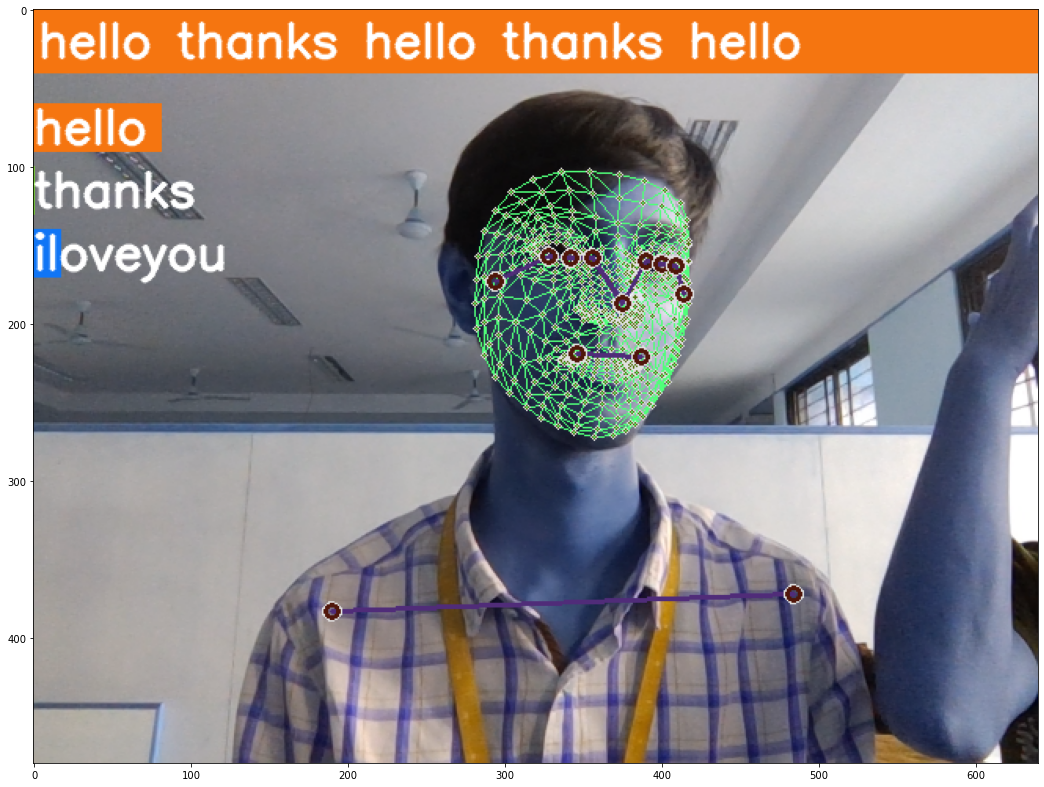

In [45]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [34]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        # Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

## Load Model

In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
model_new = tf.keras.models.load_model('action.h5')

In [36]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [37]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [38]:
yhat = model_new.predict(X_test)

In [39]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [40]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [41]:
accuracy_score(ytrue, yhat)

1.0

In [42]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [50]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model_new.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        # Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutpu